# smsspamcollection
Dataset from UCI

In [2]:
import nltk

In [6]:
# 下載stopwords
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown.

Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [8]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
len(messages)

5574

In [11]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', 
                       sep = '\t',
                       names = ['label', 'message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Visualize

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
sns.set_style('whitegrid')

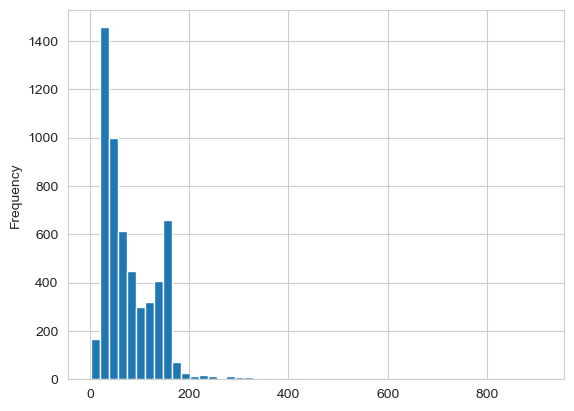

In [21]:
# messages 長度區間
messages['length'].plot.hist(bins = 50)
plt.show()

In [22]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

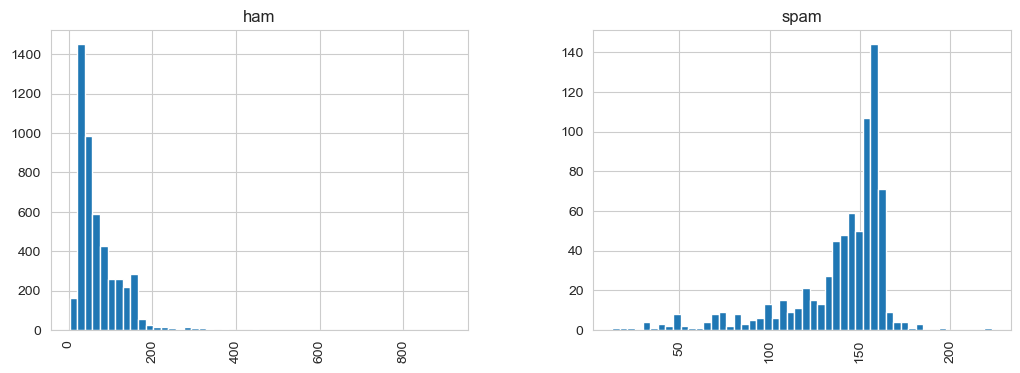

In [24]:
# ham 和 spam 文字長度差異
messages.hist(column = 'length', by = 'label', 
              bins = 50, figsize = (12, 4))
plt.show()

In [29]:
import string
from nltk.corpus import stopwords
def text_process(mess):
#     去標點
    nopunc = ''.join([char for char in mess if char not in string.punctuation])
#     去停用詞
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [30]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorize

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [109]:
len(bow_transformer.vocabulary_)

11425

In [110]:
messages_bow = bow_transformer.transform(messages['message'])

In [111]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [112]:
messages_bow.nnz 

50548

In [113]:
density = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('density: {}'.format(density))

density: 0.07940295412668218


In [114]:
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [116]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Model : MultinomialNB

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [119]:
# 評估
all_pred = spam_detect_model.predict(messages_tfidf)

In [120]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
msg_train, msg_test, label_train, label_test = train_test_split(
    messages['message'], 
    messages['label'], 
    test_size=0.33)

In [123]:
from sklearn.pipeline import Pipeline

In [124]:
# 步驟合在一起
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB())
])

In [125]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x13c059440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [126]:
predictions = pipeline.predict(msg_test)

### Evaluate : MultinomialNB

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1604
        spam       1.00      0.70      0.82       235

    accuracy                           0.96      1839
   macro avg       0.98      0.85      0.90      1839
weighted avg       0.96      0.96      0.96      1839



### Model : RandomForest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
# 步驟合在一起
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', RandomForestClassifier())
])

In [131]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x13c059440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [132]:
predictions = pipeline.predict(msg_test)

### Evaluate : RandomForest

In [133]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1604
        spam       0.99      0.78      0.87       235

    accuracy                           0.97      1839
   macro avg       0.98      0.89      0.93      1839
weighted avg       0.97      0.97      0.97      1839

